In [7]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [9]:
# installing package to plot histogram
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [10]:
!pip install pyspark_dist_explore

In [11]:
# Importing the required packages 
import pyspark.sql.functions as x
from pyspark.sql.functions import col, count, isnan, when
from pyspark.sql.types import IntegerType
#below code to install files for corelation Matrix
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StandardScaler
from pyspark_dist_explore import hist


In [12]:
#importing the Data File into Google Colab
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
#Importing the SparkConf, SparkContext 
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)

In [14]:
#creating a pyspark.sql.dataframe.DataFrame called  df by reading the data previously imported
df = spark.read.csv('games.csv',inferSchema=True, header =True)

In [15]:
# printing the schema of the dataframe
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- yearpublished: string (nullable = true)
 |-- minplayers: string (nullable = true)
 |-- maxplayers: string (nullable = true)
 |-- playingtime: integer (nullable = true)
 |-- minplaytime: integer (nullable = true)
 |-- maxplaytime: integer (nullable = true)
 |-- minage: integer (nullable = true)
 |-- users_rated: integer (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- bayes_average_rating: double (nullable = true)
 |-- total_owners: integer (nullable = true)
 |-- total_traders: integer (nullable = true)
 |-- total_wanters: integer (nullable = true)
 |-- total_wishers: integer (nullable = true)
 |-- total_comments: integer (nullable = true)
 |-- total_weights: integer (nullable = true)
 |-- average_weight: double (nullable = true)



In [16]:
# prionting the top 10 rows of the dataFrame
df.show(10)

+------+---------+--------------------+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+--------------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|    id|     type|                name|yearpublished|minplayers|maxplayers|playingtime|minplaytime|maxplaytime|minage|users_rated|average_rating|bayes_average_rating|total_owners|total_traders|total_wanters|total_wishers|total_comments|total_weights|average_weight|
+------+---------+--------------------+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+--------------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
| 12333|boardgame|   Twilight Struggle|         2005|         2|         2|        180|        180|        180|    13|      20113|       8.33774|             8.22186|       26647|          372|         

In [17]:
# Changing the DataType of columns minplayers,maxplayers,yearpublished from string to Integer Type
df = df.withColumn("minplayers", df["minplayers"].cast(IntegerType()))
df = df.withColumn("maxplayers", df["maxplayers"].cast(IntegerType()))
df = df.withColumn("yearpublished", df["yearpublished"].cast(IntegerType()))

In [18]:
# printing the schema of the dataframe
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- yearpublished: integer (nullable = true)
 |-- minplayers: integer (nullable = true)
 |-- maxplayers: integer (nullable = true)
 |-- playingtime: integer (nullable = true)
 |-- minplaytime: integer (nullable = true)
 |-- maxplaytime: integer (nullable = true)
 |-- minage: integer (nullable = true)
 |-- users_rated: integer (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- bayes_average_rating: double (nullable = true)
 |-- total_owners: integer (nullable = true)
 |-- total_traders: integer (nullable = true)
 |-- total_wanters: integer (nullable = true)
 |-- total_wishers: integer (nullable = true)
 |-- total_comments: integer (nullable = true)
 |-- total_weights: integer (nullable = true)
 |-- average_weight: double (nullable = true)



In [19]:
#printing the dimensions of the dataframe
print((df.count(), len(df.columns)))

(81312, 20)


In [20]:
#Removing the Rows containing the users_rated below 0
df=df.filter((x.col('users_rated') > 0))

In [21]:
#printing the dimensions of the dataframe after the above filtering
print((df.count(), len(df.columns)))

(56932, 20)


In [22]:
#removing the following columns "bayes_average_rating", "type","name", "id" from the dataframe
df=df.select([c for c in df.columns if c not in ["bayes_average_rating", "type","name", "id"]])

In [23]:
#printing the dimensions of the dataframe after the removal of the columns
print((df.count(), len(df.columns)))

(56932, 16)


In [24]:
# prionting the top 10 rows of the dataFrame
df.show(10)

+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|yearpublished|minplayers|maxplayers|playingtime|minplaytime|maxplaytime|minage|users_rated|average_rating|total_owners|total_traders|total_wanters|total_wishers|total_comments|total_weights|average_weight|
+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|         2005|         2|         2|        180|        180|        180|    13|      20113|       8.33774|       26647|          372|         1219|         5865|          5347|         2562|        3.4785|
|         2012|         2|         5|        150|         60|        150|    12|      14383|       8.28798|       16519|          132|         1586|         6277|          

In [25]:
# printing the schema of the dataframe
df.printSchema()

root
 |-- yearpublished: integer (nullable = true)
 |-- minplayers: integer (nullable = true)
 |-- maxplayers: integer (nullable = true)
 |-- playingtime: integer (nullable = true)
 |-- minplaytime: integer (nullable = true)
 |-- maxplaytime: integer (nullable = true)
 |-- minage: integer (nullable = true)
 |-- users_rated: integer (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- total_owners: integer (nullable = true)
 |-- total_traders: integer (nullable = true)
 |-- total_wanters: integer (nullable = true)
 |-- total_wishers: integer (nullable = true)
 |-- total_comments: integer (nullable = true)
 |-- total_weights: integer (nullable = true)
 |-- average_weight: double (nullable = true)



In [26]:
# printing the Count mean stdDev Min Max
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|     yearpublished|       minplayers|        maxplayers|       playingtime|      minplaytime|      maxplaytime|            minage|       users_rated|   average_rating|      total_owners|     total_traders|    total_wanters|     total_wishers|   total_comments|     total_weights|    average_weight|
+-------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|             56925|            56929|             56929|           

(array([5.9600e+02, 1.0850e+03, 2.1290e+03, 3.8230e+03, 4.2890e+03,
        1.0392e+04, 1.2689e+04, 1.1625e+04, 7.4590e+03, 1.5570e+03,
        8.5600e+02, 4.3100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. , 17.8,
        18.6, 19.4, 20.2, 21. , 21.8, 22.6, 23.4, 24.2, 25. ]),
 <a list of 30 Patch objects>)

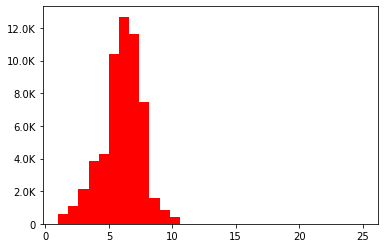

In [29]:
#plotting the Histogram
#!pip install pyspark_dist_explore
#import pyspark_dist_explore 
fig, ax = plt.subplots()
#hist(ax,dataset.select("average_rating"), bins = 30, color=['red'])
hist(ax,df.select("average_rating"), bins = 30, color=['red'])
#hist(ax, dataset.col withColumn('average_rating')

In [30]:
#Printing the count of NA values present in the DataFrame
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|yearpublished|minplayers|maxplayers|playingtime|minplaytime|maxplaytime|minage|users_rated|average_rating|total_owners|total_traders|total_wanters|total_wishers|total_comments|total_weights|average_weight|
+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|            7|         3|         3|          2|          2|          2|     2|          0|             0|           0|            0|            0|            0|             0|            0|             0|
+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+----------

In [31]:
#Dropping the NA values present in the Dataframe
df=df.dropna(how='any')

In [32]:
#Printing the count of NA values present in the DataFrame after the removal of NA
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|yearpublished|minplayers|maxplayers|playingtime|minplaytime|maxplaytime|minage|users_rated|average_rating|total_owners|total_traders|total_wanters|total_wishers|total_comments|total_weights|average_weight|
+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+--------------+-------------+--------------+
|            0|         0|         0|          0|          0|          0|     0|          0|             0|           0|            0|            0|            0|             0|            0|             0|
+-------------+----------+----------+-----------+-----------+-----------+------+-----------+--------------+------------+-------------+-------------+-------------+----------

In [33]:
#printing the dimensions of the dataframe after the removal of NA
print((df.count(), len(df.columns)))

(56925, 16)


(array([ 482.,   86.,   34.,  770.,  112.,  350., 1565.,  379.,  880.,
         576., 2760., 1874., 1629., 4107., 2493., 4100., 5666., 3840.,
        4635., 3704., 5517., 3448., 2330., 2693.,  845.,  652.,  726.,
         107.,  120.,  445.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <a list of 30 Patch objects>)

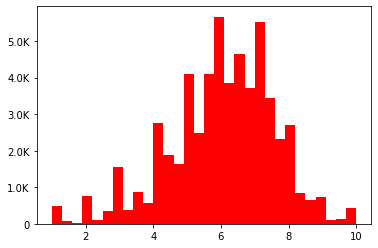

In [34]:
#printing the Histogram after NA removal

from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hist(ax,df.select("average_rating"), bins = 30, color=['red'],)
#hist(ax, dataset.col withColumn('average_rating')

In [35]:
#Generating the Corelation Matrix 
columnsData=df.columns#[c for c in dataset2.columns if c not in ['average_rating'] ]
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=columnsData, outputCol=vector_col)
myGraph_vector = assembler.transform(df)#.select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)
matrix1 = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix1.toArray().tolist()
print("The generated Correlation Matrix is:: \n {0}".format(corrmatrix))


The generated Correlation Matrix is:: 
 [[1.0, 0.004372489082671985, 0.0049703856990403325, 0.006232916329865973, 0.005242466181763035, 0.006232916329865973, 0.12522219543828494, 0.037449604506840636, 0.10840383773603023, 0.04773344107604199, 0.06439133752559806, 0.062276921119165635, 0.052525157614782124, 0.043813716831314624, 0.03622198669878126, 0.12530663336643624], [0.004372489082671985, 1.0, 0.03718879898920534, 0.02428356613412483, 0.0265323496473018, 0.02428356613412483, 0.11117982079071105, 0.020313525169298213, -0.032858165438786856, 0.014536490514991217, 0.024624729226298204, -0.008714669167627476, -0.0038365658456161987, 0.02297155625899625, 0.019011603278792415, -0.022024292273003405], [0.0049703856990403325, 0.03718879898920534, 1.0, -0.0010206921408426179, -0.0009504277066825062, -0.0010206921408426179, 0.004521518981639495, -0.0008609769588981912, -0.008339907100546615, -0.0009813364242238398, -0.002386341572889714, -0.0035900367546440105, -0.00250317090907312, -0.00150

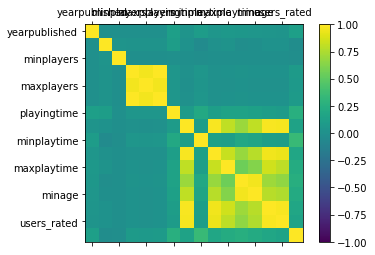

In [36]:
    # Generating the HeatMap of the Data
    figure=plt.figure(1)
    figure1=figure.add_subplot(111)
    figure1.set_xticklabels(['']+columnsData)
    figure1.set_yticklabels(['']+columnsData)
    figure.colorbar(figure1.matshow(corrmatrix,vmax=1,vmin=-1))
    plt.show()

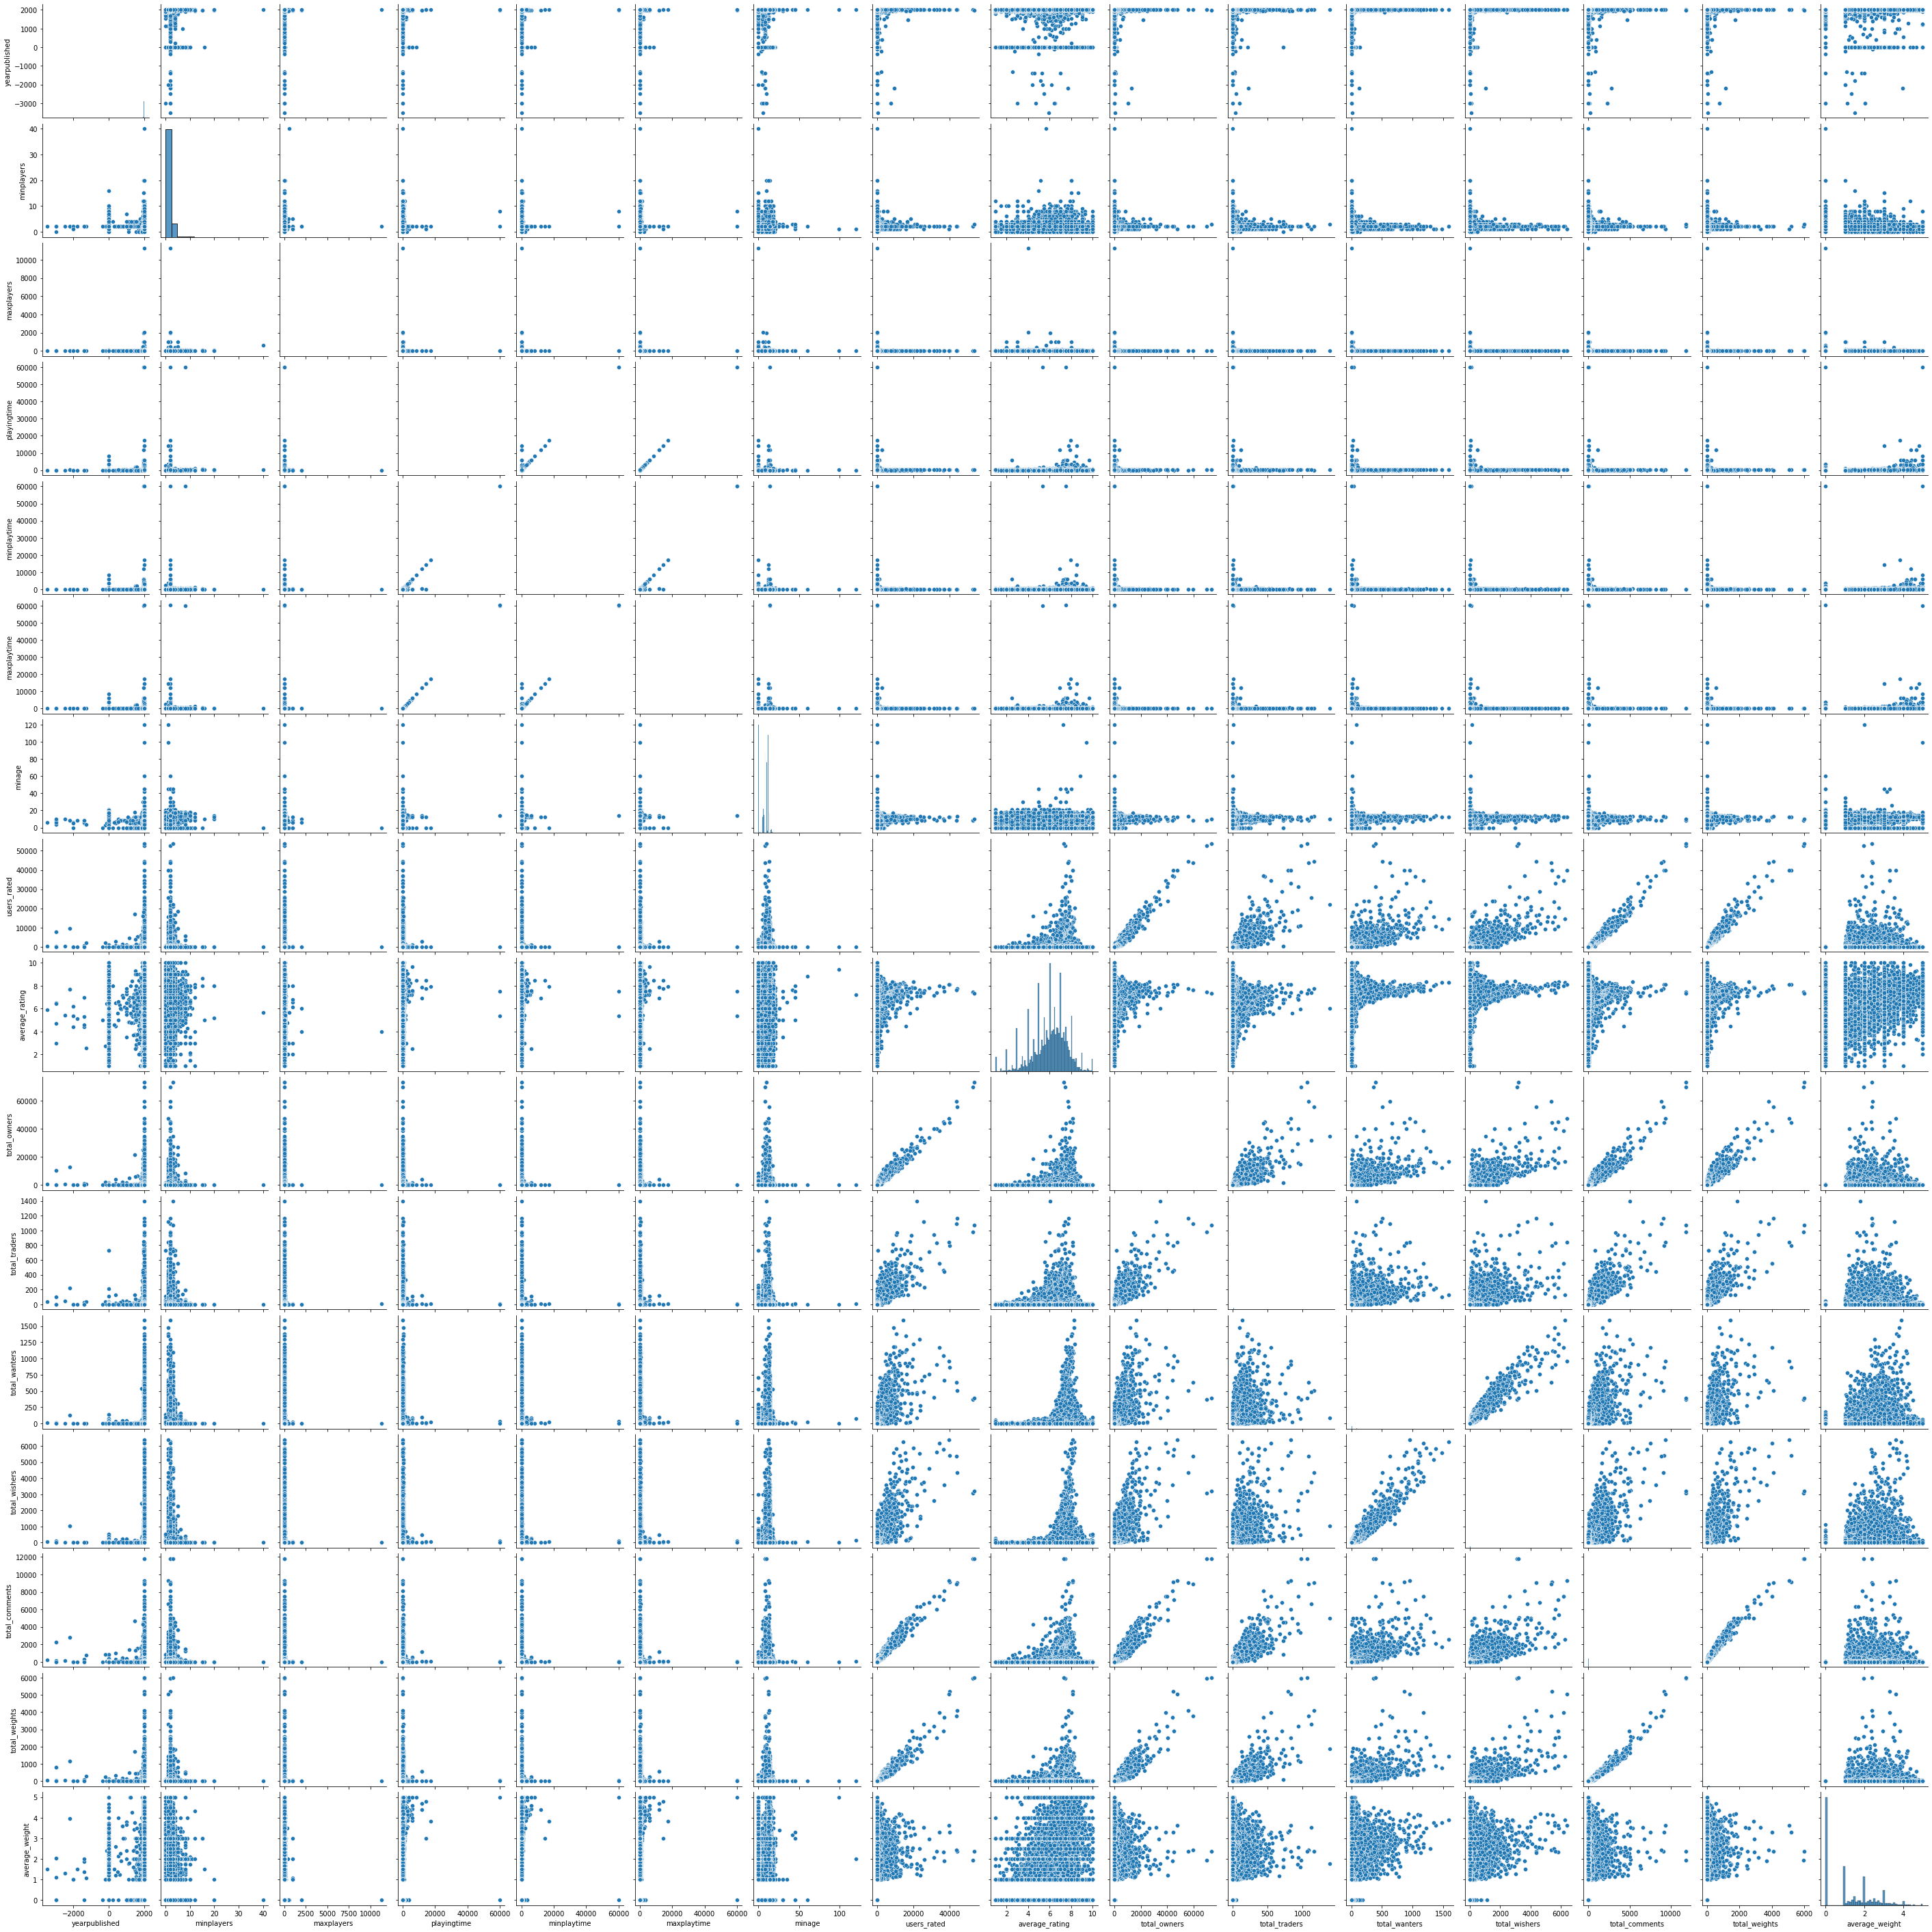

In [37]:
# Plotting the pairplot
import seaborn as sns
sns.pairplot(df.toPandas())

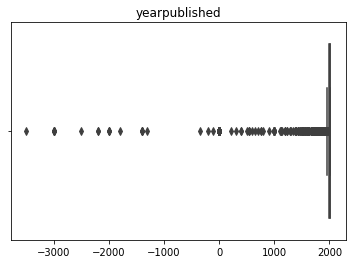

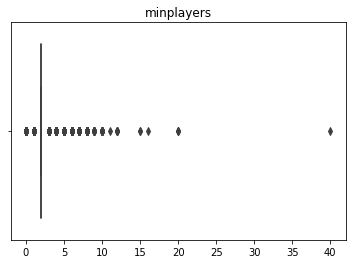

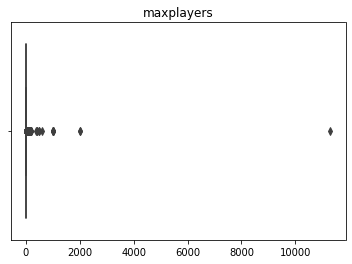

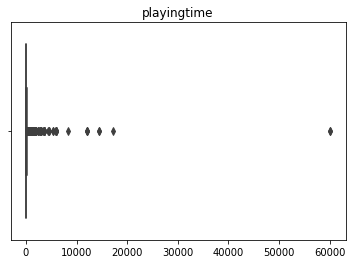

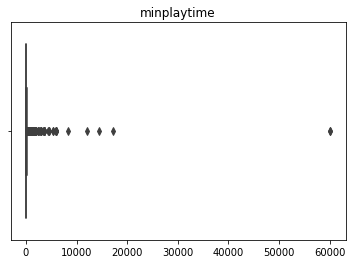

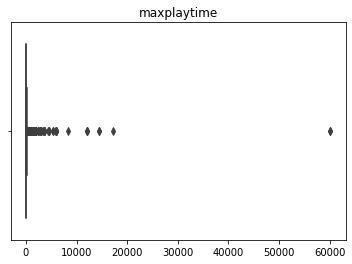

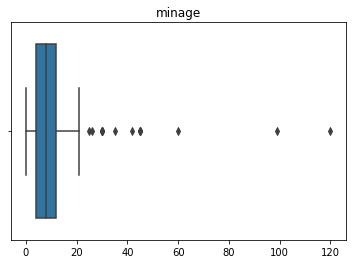

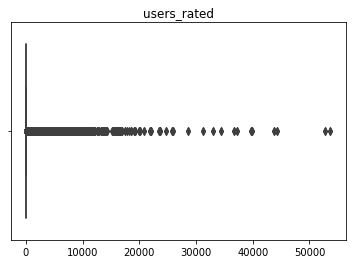

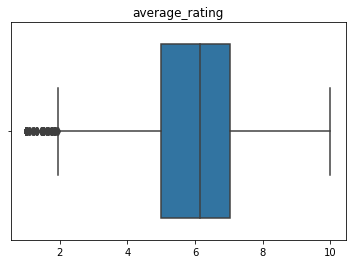

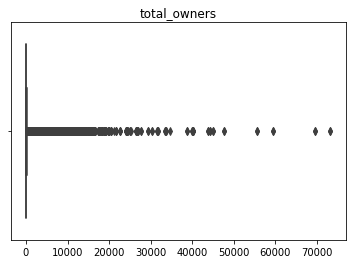

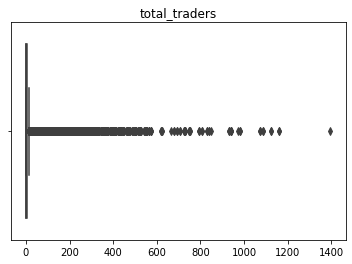

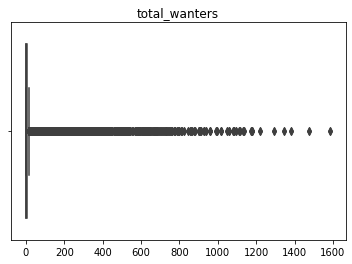

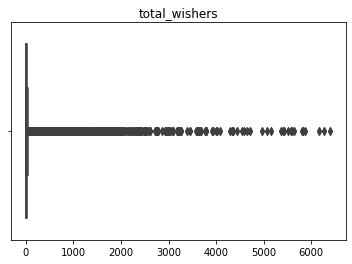

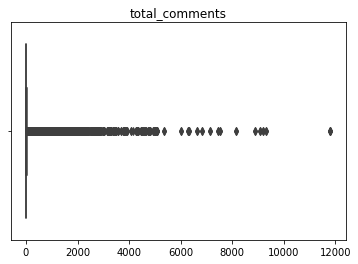

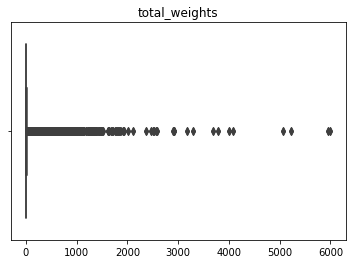

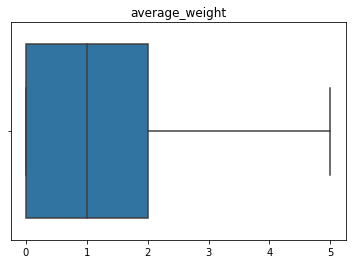

In [38]:
#Plotting the Box plots
for i in columnsData:
  l = df.select(i).collect()
  l = [r[0] for r in l]
  plt.figure()
  b = sns.boxplot(x = l)
  plt.title(i)
  plt.show()



In [39]:
#Input all the features into single vectors
#standard Scaling all the feature vector to handle the outlier observed in the Boxplots
columnsReg=[c for c in df.columns if c not in ['average_rating','yearpublished']]
assembler = VectorAssembler(inputCols=columnsReg, outputCol = 'Features')
output = assembler.transform(df)
scaled = StandardScaler(inputCol = 'Features',outputCol = 'scaled_features',withStd = True,withMean = True)
final_df = scaled.fit(output).transform(output)
final_df.select('Features','scaled_features').show(1)
finalized_data = final_df.select("Features","average_rating","scaled_features")
finalized_data.show()

+--------------------+--------------------+
|            Features|     scaled_features|
+--------------------+--------------------+
|[2.0,2.0,180.0,18...|[-0.0063462794810...|
+--------------------+--------------------+
only showing top 1 row

+--------------------+--------------+--------------------+
|            Features|average_rating|     scaled_features|
+--------------------+--------------+--------------------+
|[2.0,2.0,180.0,18...|       8.33774|[-0.0063462794810...|
|[2.0,5.0,150.0,60...|       8.28798|[-0.0063462794810...|
|[1.0,7.0,210.0,30...|       8.28994|[-1.2694999838810...|
|[2.0,4.0,240.0,24...|       8.20407|[-0.0063462794810...|
|[2.0,5.0,150.0,90...|       8.14261|[-0.0063462794810...|
|[1.0,5.0,150.0,30...|       8.11957|[-1.2694999838810...|
|[2.0,2.0,45.0,45....|        8.1676|[-0.0063462794810...|
|[1.0,4.0,150.0,15...|       8.15901|[-1.2694999838810...|
|[2.0,4.0,90.0,30....|       8.07879|[-0.0063462794810...|
|[2.0,6.0,200.0,60...|       8.07933|[-0.0063462

In [40]:
#test Train split the Data into 80:20 Ratio
train,test = finalized_data.randomSplit([0.8,0.2],seed=42)
regressor = LinearRegression(featuresCol = 'scaled_features', labelCol = 'average_rating')

#Fitting the Training sent to linearRegression Model
regressor = regressor.fit(train)

#Model Building 
pred = regressor.evaluate(test)

#Predicting
pred.predictions.show()

+--------------------+--------------+--------------------+------------------+
|            Features|average_rating|     scaled_features|        prediction|
+--------------------+--------------+--------------------+------------------+
|(14,[0,1,2,3,4,5,...|           3.0|[-1.2694999838810...| 5.357054248980058|
|(14,[0,1,2,3,4,5,...|           2.0|[-1.2694999838810...| 5.472450147939093|
|(14,[0,1,2,3,4,5,...|           4.0|[-1.2694999838810...| 5.472450147939093|
|(14,[0,1,2,3,4,5,...|           7.0|[-0.0063462794810...| 5.395723754488879|
|(14,[0,1,2,3,4,5,...|           3.0|[-0.0063462794810...| 5.434594767362343|
|(14,[0,1,2,3,4,5,...|           2.0|[-0.0063462794810...|  5.39565472239216|
|(14,[0,1,2,3,4,5,...|           4.0|[-0.0063462794810...| 5.434334384004851|
|(14,[0,1,2,3,4,5,...|           1.0|[-0.0063462794810...| 5.511311004708688|
|(14,[0,1,2,3,4,5,...|           5.0|[-0.0063462794810...| 5.511311004708688|
|(14,[0,1,2,3,4,5,...|           1.0|[-0.0063462794810...|  5.39

In [41]:
#calculating the summary to find out the Root mean suared error and Rsquared to check the model accuracy
Summary = regressor.summary
print("RMSE: %f" % Summary.rootMeanSquaredError)
print("r2: %f" % Summary.r2)

RMSE: 1.452548
r2: 0.155437


In [45]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [52]:
!jupyter nbconvert --to pdf RegressionSpark.ipynb

[NbConvertApp] Converting notebook RegressionSpark.ipynb to pdf
[NbConvertApp] Support files will be in RegressionSpark_files/
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory ./RegressionSpark_files
[NbConvertApp] Making directory .

In [51]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks
